In [0]:
import tensorflow as tf

# After every epoch the function goes here and checks if the accuracy is over 99%.
#The log is an object the result of describing every iteration.
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('acc')>0.99): # TODO - Change this to get the required accuracy
      print("\nReached 99% accuracy so cancelling training!")
      self.model.stop_training = True

# Training set database - photos of
mnist = tf.keras.datasets.mnist
# Fill traing database into variables - the function divides the set into 2 sets:
# train and test and uses the train to learn examples and the test to test its accuracy
# x - input, y - output
(x_train, y_train),(x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

callbacks = myCallback()


# model = tf.keras.models.Sequential([
#   tf.keras.layers.Flatten(input_shape=(28, 28)),
#   tf.keras.layers.Dense(512, activation=tf.nn.relu),
#   tf.keras.layers.Dense(10, activation=tf.nn.softmax)
# ])
# The model is the learning object - the sequence of learning is:
model = tf.keras.models.Sequential()
# Takes an array of 28*28 and turns it to a one dimensional array.
model.add(tf.keras.layers.Flatten(input_shape=(28, 28)))
# Adds to the probabilaty of important features according to the training.
model.add(tf.keras.layers.Dense(512, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))

# Insert parameters for learning from training set
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# An epoch is an iteration over the entire training and test data provided. The
# model not trained for a number of iterations given by epochs, but merely until
# the epoch of index epochs is reached.
model.fit(x_train, y_train, epochs=10, callbacks=[callbacks])






11493376/11490434 [==============================] - 0s 0us/step
Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 10s 162us/sample - loss: 0.2012 - acc: 0.9404
Epoch 2/10
60000/60000 [==============================] - 10s 159us/sample - loss: 0.0800 - acc: 0.9756
Epoch 3/10
60000/60000 [==============================] - 10s 161us/sample - loss: 0.0529 - acc: 0.9832
Epoch 4/10
60000/60000 [==============================] - 9s 150us/sample - loss: 0.0370 - acc: 0.9886
Epoch 5/10
59616/60000 [============================>.] - ETA: 0s - loss: 0.0267 - acc: 0.9913
Reached 99% accuracy so cancelling training!
60000/60000 [==============================] - 9s 153us/sample - loss: 0.0269 - acc: 0.9913


The string is:  1


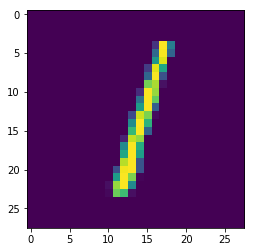

In [0]:
import numpy

currImg = x_test[2] # TODO - Alter this for different photos
#Creats a 3D array 
currImgArr = currImg[numpy.newaxis, ...]

#The function reads the number in the picture
predictedNum = numpy.argmax(model.predict(currImgArr))
print("The string is: ", predictedNum)

#Presenting the picture
from matplotlib import pyplot as plt
plt.imshow(currImg, interpolation='nearest')
plt.show()

In [0]:

import numpy
import PIL
import cv2

currImg = '/content/2.png' #TODO - Alter this for different photos

print("Processing image")  
#loading the image
im = cv2.imread(currImg, 0) 
print(im.shape) 
#Turns the image to the size of 28*28
im = cv2.resize(im,  (28, 28))
print(model.predict(im.reshape(1,28,28)))
numpy.argmax(model.predict(im.reshape(1,28,28)))




Processing image
(3500, 3500)
[[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]]


2